In [1]:
import pandas as pd
import numpy as np
fname = './districts.txt'
districts = pd.read_csv(fname,sep=" ", header = None)
districts.head()

,0,1
0,"Achham,",4586285.0
1,"Arghakhanchi,",4589557.0
2,"Baglung,",4588144.0
3,"Baitadi,",4586293.0
4,"Bajhang,",4586291.0


In [2]:
import getNodes
#dir()
#help(anchals)

In [3]:
getNodes.get_AnchalList()
#getNodes.get_DistList()

['Janakpur',
 'Bagmati',
 'Sagarmatha',
 'Gandaki',
 'Koshi',
 'Dhaulagiri',
 'Narayani',
 'Karnali',
 'Rapti',
 'Seti',
 'Bheri',
 'Lumbini',
 'Mechi',
 'Mahakali']

In [4]:
getNodes.get_DistName('4589418')

'Rautahat'

In [5]:
#Testing Testing
data1 = getNodes.get_DistData('Rautahat')

In [6]:
data1[0][1:10],data1[1][1:10]

(array([ 85.25384,  85.26056,  85.28069,  85.29177,  85.30522,  85.30705,
         85.3098 ,  85.31388,  85.31596]),
 array([ 26.75829,  26.75551,  26.75361,  26.75318,  26.75221,  26.75196,
         26.75103,  26.75015,  26.74952]))

Populating the interactive namespace from numpy and matplotlib


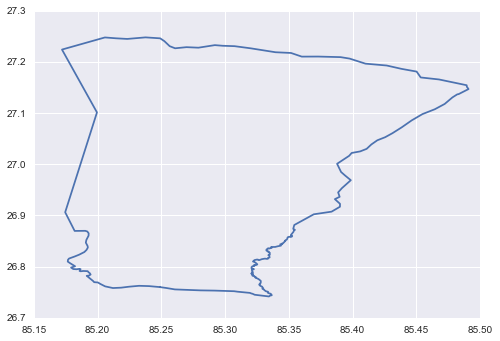

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(data1[0],data1[1])
show()

In [8]:
def distMaps():
    allDists = getNodes.get_DistList()
    for dist in allDists:        
        data = getNodes.get_DistData(dist)
    #    plt.plot(data[0],data[1])
        plt.fill(data[0],data[1],lw=2,color=np.random.rand(3,1))

    show()    

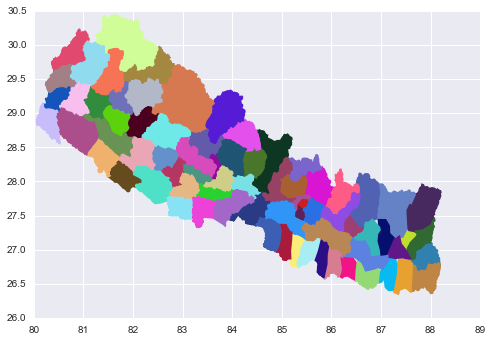

In [9]:
distMaps()

Get Dist population,fill district color per population size

In [10]:
#data taken from https://github.com/opennepal/odp-census
fname = './data/population_data.csv'
population = pd.read_csv(fname)
population.head()

,District,Zone,Geographical Region,Development Region,Category,Value
0,Taplejung,Mechi,Mountain,Eastern,Geographical Area (sq.km.),3646.0
1,Taplejung,Mechi,Mountain,Eastern,Holding Number,23444.0
2,Taplejung,Mechi,Mountain,Eastern,Holding Area (ha),22327.5
3,Taplejung,Mechi,Mountain,Eastern,Household,26509.0
4,Taplejung,Mechi,Mountain,Eastern,Population,127461.0


In [11]:
allDists = getNodes.get_DistList()
#allDists

In [12]:
population.keys()

Index([u'District', u'Zone', u'Geographical Region', u'Development Region',
       u'Category ', u'Value'],
      dtype='object')

In [13]:
#Category has extra space
population['Category '].head()

0    Geographical Area (sq.km.)
1                Holding Number
2             Holding Area (ha)
3                     Household
4                    Population
Name: Category , dtype: object

In [14]:
abc = population[population['Category ']=='Population']
abc.head()

,District,Zone,Geographical Region,Development Region,Category,Value
4,Taplejung,Mechi,Mountain,Eastern,Population,127461.0
11,Panchthar,Mechi,Hill,Eastern,Population,191817.0
18,Ilam,Mechi,Hill,Eastern,Population,290254.0
25,Jhapa,Mechi,Terai,Eastern,Population,812650.0
32,Morang,Kosi,Terai,Eastern,Population,965370.0


In [15]:
dists = abc['District']
vals =  abc['Value']
#vals.plot()

In [16]:
dists.iloc(0)[0], vals.iloc(0)[0]

('Taplejung', 127461.0)

In [17]:
vals.describe()

count    7.500000e+01
mean     3.532601e+05
std      2.837822e+05
min      6.538000e+03
25%      1.655680e+05
50%      2.686130e+05
75%      4.917055e+05
max      1.744240e+06
Name: Value, dtype: float64

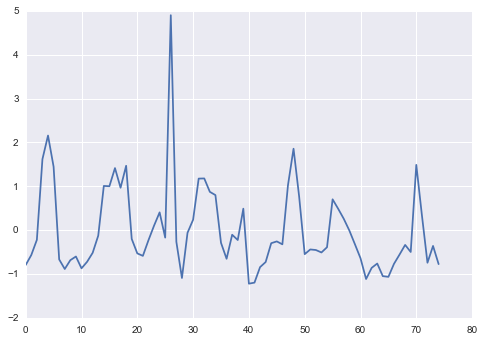

In [18]:
# For each district, normalize the number of population with the total population
# the idea is to fill the districts with color proportional to pop. size
pmean = vals.mean()
pstd = vals.std()
carray = []
for item in vals:
    carray.append((item - pmean)/pstd)
plt.plot(carray)    

In [19]:
carray[0:5]

[-0.79567733420241571,
 -0.56889777173747713,
 -0.22202258076288023,
 1.6188117829861728,
 2.1569710032553848]

In [20]:
dists[10:15]

74      Solukhumbu
81     Okhaldhunga
88         Khotang
95        Udayapur
102        Saptari
Name: District, dtype: object

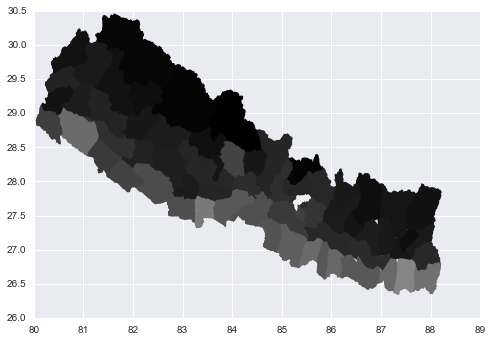

In [33]:
def mapNodes(allDists,arr):
    a = 0
    cmap = get_cmap(75)
    for dist in allDists:
        col = cmap(a)
#        change few names to work with the dist list 
        if (dist == 'Sindhupalchok'):
            dist = 'Sindhupalchowk'
        if (dist == 'Kavre'):    
            dist = 'Kavrepalanchok'
        if (dist == 'Chitawan'):    
            dist = 'Chitwan'     
        if (dist == 'Tanahu'):    
            dist = 'Tanahun'  
        if (dist == 'Kapilbastu'):    
            dist = 'Kapilvastu'              
        if (dist == 'Darchaula'):    
            dist = 'Darchula'             
        data = getNodes.get_DistData(dist)
    #    plt.plot(data[0],data[1])
        num = round((carray[a] + 1.23) / 6.5,6)
        mm = array([[num],[ num],[ num]])                              
#        plt.fill(data[0],data[1],lw=2,color=np.random.rand(3,1))
#        plt.fill(data[0],data[1],lw=2,color = str(round((carray[a] + 1.23) / 10,6)))
        plt.fill(data[0],data[1],lw=2,color = mm)
        a = a + 1
    show() 
mapNodes(dists,carray)    

In [22]:
np.random.rand(3,1)

array([[ 0.6146254 ],
       [ 0.75524878],
       [ 0.44833027]])

In [24]:
len(carray), min(carray), max(carray)

(75, -1.2217893522263414, 4.9015759789696425)